<a href="https://colab.research.google.com/github/RafliAbdulHaliim/Uas-Big-Data-Prediksi-Kelulusan-Siswa/blob/main/UAS_BIG_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediksi Kelulusan Siswa**

A. Bidang yang Dipilih:Prediksi Kelulusan Siswa

Alasan Pemilihan:


*   Relevansi: Tingkat kelulusan siswa adalah indikator penting dalam sistem pendidikan yang memengaruhi masa depan siswa. Prediksi kelulusan dapat membantu sekolah dan siswa dalam perencanaan belajar.

*   Ketersediaan Data: Data akademik seperti skor sosioekonomi, jam belajar, jam tidur, tingkat kehadiran, dan nilai ujian tersedia dalam dataset, yang relevan untuk membangun model prediktif.

*   Tantangan Data Science: Prediksi kelulusan siswa merupakan tantangan menarik karena dipengaruhi oleh berbagai faktor, seperti perilaku siswa, latar belakang sosial, dan strategi belajar.

Tujuan:

Membangun model machine learning untuk memprediksi kelulusan siswa dengan akurasi tinggi berdasarkan faktor-faktor akademik dan sosial.


B. Data dan Informasi

Dataset:


*   data.csv

Sumber:



*   Kaggle

Waktu:


*    Updated 13 days ago


<h3>Penjelasan Kolom:</h3>
<table border="1">
    <thead>
        <tr>
            <th>Kolom</th>
            <th>Penjelasan</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>socioeconomic_score</td><td>Skor sosial ekonomi siswa</td></tr>
        <tr><td>study_hours</td><td>Rata-rata jam belajar siswa per hari</td></tr>
        <tr><td>sleep_hours</td><td>Rata-rata jam tidur siswa per hari</td></tr>
        <tr><td>attendance</td><td>	Persentase tingkat kehadiran siswa</td></tr>
        <tr><td>grades</td><td>Nilai akhir siswa</td></tr>
        <tr><td>lulus</td><td>Indikator kelulusan siswa (1 = lulus, 0 = tidak lulus)</td></tr>
    </tbody>
</table>

<h2>C. Pre-processing Data</h2>
<p>Kode pre-processing data telah Anda lakukan dengan baik di notebook Colab Anda. Berikut ringkasannya:</p>
<ul>
    <li><strong>Import Library:</strong> import pandas as pd</li>
    <li><strong>Membaca Data:</strong> df = pd.read_csv('/content/data.csv')</li>
    <li><strong>Memahami Data:</strong>
        <ul>
            <li>df.info(): Menampilkan tipe data dan jumlah nilai non-null.</li>
            <li>df.describe(): Statistik deskriptif untuk kolom numerik.</li>
            <li>df.isnull().sum(): Memeriksa jumlah nilai kosong di setiap kolom.</li>
        </ul>
    </li>
    <li><strong>Menangani Nilai Null:</strong>
        <ul>
            <li>Kolom numerik diisi dengan rata-rata.</li>
            <li>Kolom kategorikal diisi dengan modus.</li>
        </ul>
    </li>
    <li><strong>Mengubah Nama Kolom:</strong> Menggunakan df.rename() untuk mempermudah penggunaan.</li>
    <li><strong>Menampilkan Data:</strong> df.head() untuk melihat sampel data setelah pre-processing.</li>
    <li><strong>Matriks Korelasi:</strong> df.corr() untuk melihat korelasi antar variabel numerik. (Anda dapat menambahkan kode ini untuk menampilkan matriks korelasi)</li>
</ul>

<h2>D. Pemilihan Fitur</h2>
<p>Fitur yang dipilih untuk membangun model prediktif keterlambatan penerbangan:</p>
<ul>
    <li><strong>socioeconomic_score:</strong> Faktor sosial ekonomi memengaruhi akses pendidikan dan kualitas belajar siswa.</li>
    <li><strong>study_hours:</strong>Jam belajar merupakan indikator penting untuk memahami kebiasaan belajar siswa.</li>
    <li><strong>sleep_hours:</strong>Durasi tidur berkaitan dengan konsentrasi dan performa akademik siswa.</li>
    <li><strong>attendance:</strong> Kehadiran adalah faktor langsung yang memengaruhi pencapaian akademik siswa.
</li>
</ul>

<h3>Alasan Pemilihan:</h3>
<p>Prediksi kelulusan siswa relevan sebagai indikator keberhasilan pendidikan, dengan manfaat praktis bagi siswa, guru, dan orang tua untuk meningkatkan hasil belajar. Dataset yang digunakan mencakup atribut penting seperti kebiasaan belajar, kondisi sosial ekonomi, dan perilaku siswa, sehingga cukup lengkap untuk analisis. Tantangan dalam menangkap hubungan kompleks antar variabel memberikan peluang untuk membangun model prediktif yang andal dan berdampak positif pada peningkatan kualitas pendidikan.</p>









In [ ]:
!kaggle datasets list
!kaggle datasets download -d "stealthtechnologies/predict-student-performance-dataset"
import zipfile

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Dataset URL: https://www.kaggle.com/datasets/stealthtechnologies/predict-student-performance-dataset
License(s): apache-2.0
  0% 0.00/12.1k [00:00<?, ?B/s]
100% 12.1k/12.1k [00:00<00:00, 24.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/predict-student-performance-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

Index(['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)',
       'Grades'],
      dtype='object')
Nilai kosong per kolom:
 socioeconomic_score    0
study_hours            0
sleep_hours            0
attendance             0
Grades                 0
grades                 0
lulus                  0
dtype: int64
       socioeconomic_score  study_hours  sleep_hours   attendance  \
count          1388.000000  1388.000000  1388.000000  1388.000000   
mean              0.552274     4.560807     8.047262    58.536023   
std               0.261272     1.897581     1.370700    11.675287   
min               0.101280     0.800000     4.800000    40.000000   
25%               0.322118     3.475000     7.000000    49.000000   
50%               0.545945     3.900000     8.400000    57.000000   
75%               0.789610     5.900000     9.100000    66.000000   
max               0.999820    10.000000    10.000000   100.000000   

            Grades       grades   lulus  
count

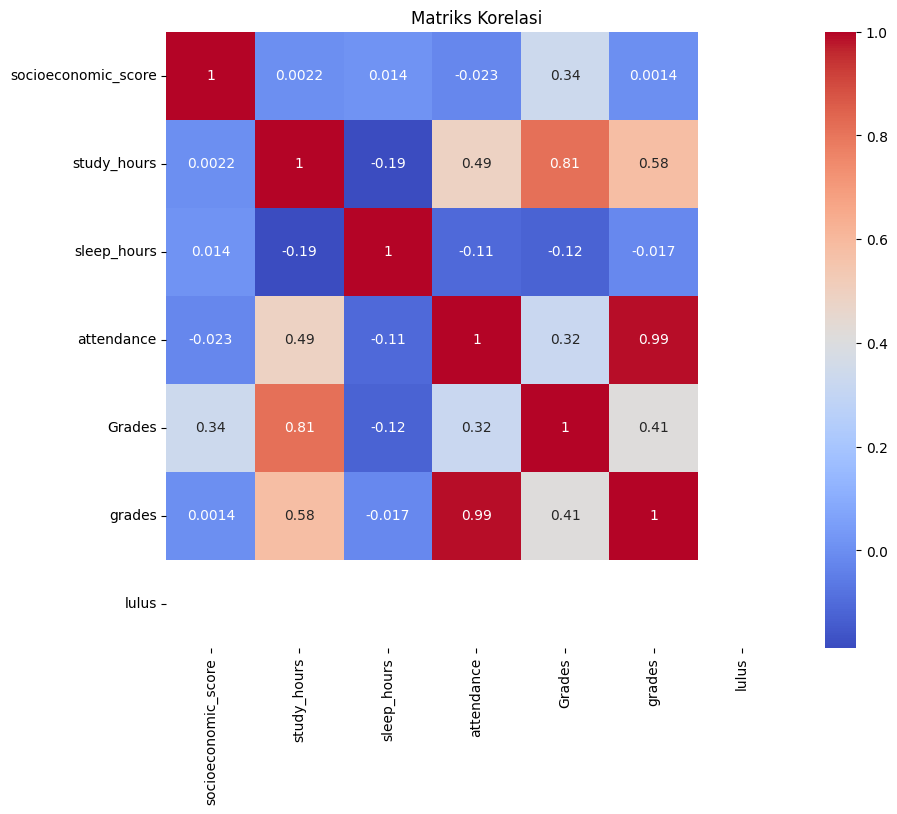

In [ ]:
# Inisialisasi SparkSession
spark = SparkSession.builder.appName("Classification_Project").getOrCreate()

# Membaca dataset
file_path = '/content/data.csv'
df = pd.read_csv(file_path)

# Print the DataFrame columns to ensure the exact names
print(df.columns)

# Create the 'grades' column first by averaging the three score columns
# Adjusted column names to match those in the DataFrame
# Note: If your CSV file uses a tab instead of a comma, try the following line with the correct delimiter
# df = pd.read_csv(file_path, delimiter='\t')
df['grades'] = df[['Socioeconomic Score', 'Study Hours', 'Sleep Hours','Attendance (%)']].mean(axis=1)

# Mengganti nama kolom untuk kemudahan
column_mapping = {
    "Socioeconomic Score": "socioeconomic_score",
    "Study Hours": "study_hours",
    "Sleep Hours": "sleep_hours",
    "Attendance (%)": "attendance"
}

# Apply column mapping
df.rename(columns=column_mapping, inplace=True)

# Apply column mapping
df.rename(columns=column_mapping, inplace=True)

# Menambahkan kolom target 'lulus'
df['lulus'] = df['grades'].apply(lambda x: 1 if x >= 50 else 0)


# Memeriksa nilai kosong
print("Nilai kosong per kolom:\n", df.isnull().sum())

# Menampilkan ringkasan data
print(df.describe())

# Membuat matriks korelasi
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")  # Use only numerical columns here
plt.title("Matriks Korelasi")
plt.show()

# Mengonversi DataFrame Pandas ke DataFrame Spark after renaming columns
spark_df = spark.createDataFrame(df) # Recreate the Spark DataFrame with the updated column names

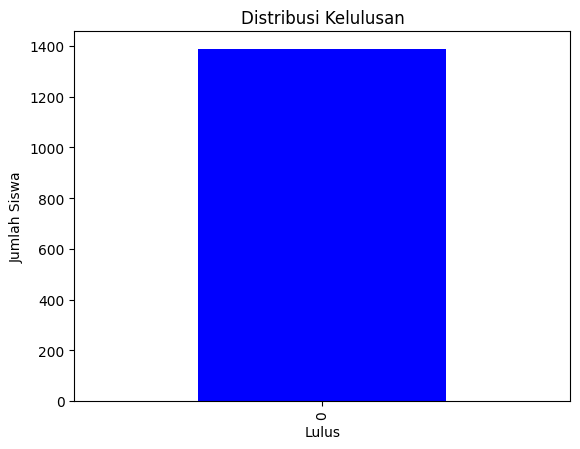

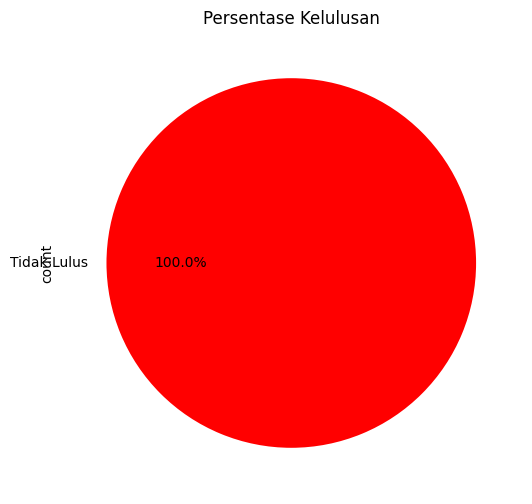

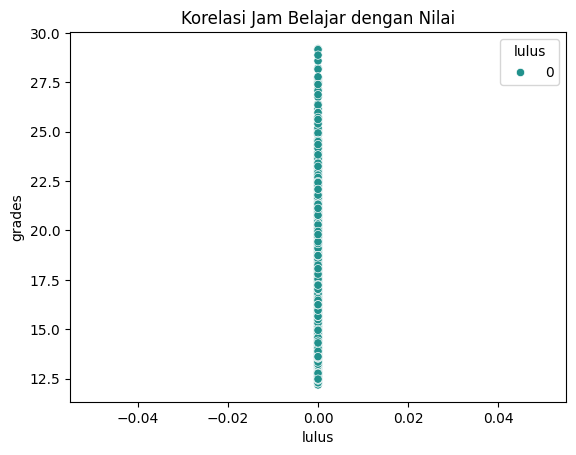

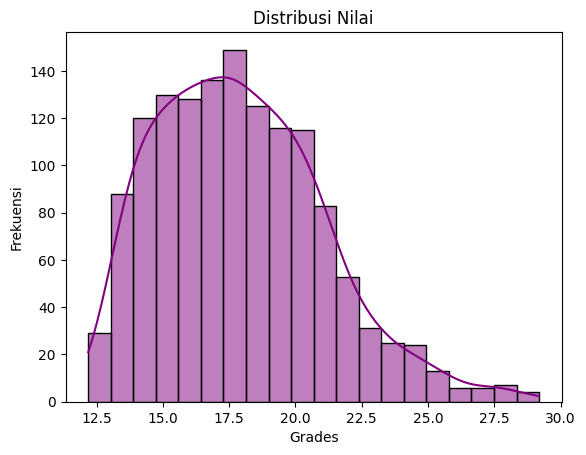

In [ ]:
# Bar chart distribusi kolom 'lulus'
lulus_count = df['lulus'].value_counts()
lulus_count.plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribusi Kelulusan")
plt.xlabel("Lulus")
plt.ylabel("Jumlah Siswa")
plt.show()

# Pie chart distribusi grades
plt.figure(figsize=(6, 6))
df['lulus'].value_counts().plot.pie(autopct="%1.1f%%", labels=['Tidak Lulus', 'Lulus'], colors=['red', 'green'])
plt.title("Persentase Kelulusan")
plt.show()

# Scatter plot study_hours vs grades
# Convert 'lulus' to numerical type if needed
df['lulus'] = pd.to_numeric(df['lulus'])

# Use 'data' parameter and specify 'x' and 'y'
sns.scatterplot(data=df, x='lulus', y='grades', hue='lulus', palette='viridis')
plt.title("Korelasi Jam Belajar dengan Nilai")
plt.show()

# Histogram grades
sns.histplot(df['grades'], kde=True, bins=20, color='purple')
plt.title("Distribusi Nilai")
plt.xlabel("Grades")
plt.ylabel("Frekuensi")
plt.show()

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Definisi evaluator untuk berbagai metrik
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol='lulus', metricName='accuracy')
f1_evaluator = MulticlassClassificationEvaluator(labelCol='lulus', metricName='f1')
# Use weightedPrecision for multi-class classification
precision_evaluator = MulticlassClassificationEvaluator(labelCol='lulus', metricName='weightedPrecision')
recall_evaluator = MulticlassClassificationEvaluator(labelCol='lulus', metricName='weightedRecall')

# Evaluasi model
results = {}
for name, model in models.items():
    print(f"Training {name}...")

    # Melatih model
    trained_model = model.fit(train_data)

    # Prediksi pada test data
    predictions = trained_model.transform(test_data)

    # Menghitung berbagai metrik
    accuracy = accuracy_evaluator.evaluate(predictions)
    f1_score = f1_evaluator.evaluate(predictions)
    precision = precision_evaluator.evaluate(predictions) # Evaluate using weightedPrecision
    recall = recall_evaluator.evaluate(predictions) # Evaluate using weightedRecall

    # Menampilkan hasil evaluasi untuk model ini
    print(f"Accuracy for {name}: {accuracy:.2f}")
    print(f"F1 Score for {name}: {f1_score:.2f}")
    print(f"Precision for {name}: {precision:.2f}")
    print(f"Recall for {name}: {recall:.2f}")

    # Menyimpan hasil evaluasi model
    results[name] = {'model': trained_model, 'accuracy': accuracy, 'f1_score': f1_score, 'precision': precision, 'recall': recall}

# Memilih dua model terbaik berdasarkan akurasi
sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)
best_models = sorted_results[:2]

# Menampilkan model terbaik
print("\nBest Models Based on Accuracy:")
for model_name, metrics in best_models:
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.2f}, F1 Score = {metrics['f1_score']:.2f}, Precision = {metrics['precision']:.2f}, Recall = {metrics['recall']:.2f}")

Training RandomForestClassifier...
Accuracy for RandomForestClassifier: 1.00
F1 Score for RandomForestClassifier: 1.00
Precision for RandomForestClassifier: 1.00
Recall for RandomForestClassifier: 1.00
Training GBTClassifier...
Accuracy for GBTClassifier: 1.00
F1 Score for GBTClassifier: 1.00
Precision for GBTClassifier: 1.00
Recall for GBTClassifier: 1.00
Training LogisticRegression...
Accuracy for LogisticRegression: 1.00
F1 Score for LogisticRegression: 1.00
Precision for LogisticRegression: 1.00
Recall for LogisticRegression: 1.00
Training DecisionTreeClassifier...
Accuracy for DecisionTreeClassifier: 1.00
F1 Score for DecisionTreeClassifier: 1.00
Precision for DecisionTreeClassifier: 1.00
Recall for DecisionTreeClassifier: 1.00

Best Models Based on Accuracy:
RandomForestClassifier: Accuracy = 1.00, F1 Score = 1.00, Precision = 1.00, Recall = 1.00
GBTClassifier: Accuracy = 1.00, F1 Score = 1.00, Precision = 1.00, Recall = 1.00


In [ ]:
# Hyperparameter tuning untuk model terbaik
for name, model_data in best_models:
    print(f"Hyperparameter tuning for {name}...")
    # Use the original estimator (RandomForestClassifier) instead of the trained model
    model = models[name]  # Access the original estimator from the 'models' dictionary
    param_grid = ParamGridBuilder().addGrid(model.maxDepth, [5, 10]).addGrid(model.maxBins, [32, 64]).build()
    crossval = CrossValidator(estimator=model, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=3)
    best_model = crossval.fit(train_data).bestModel
    predictions = best_model.transform(test_data)
    accuracy = evaluator.evaluate(predictions)
    print(f"Best Accuracy for {name} after tuning: {accuracy:.2f}")

Hyperparameter tuning for RandomForestClassifier...
Best Accuracy for RandomForestClassifier after tuning: 1.00
Hyperparameter tuning for GBTClassifier...
Best Accuracy for GBTClassifier after tuning: 1.00


**Karakteristik Model Terbaik dan Korelasinya dengan Data RandomForestClassifier :**



Karakteristik:RandomForest adalah model ensemble yang menggabungkan beberapa decision tree untuk membuat prediksi yang lebih robust dan akurat. Model ini mampu menangani data yang kompleks dengan banyak fitur dan non-linearitas.
Korelasi dengan Data: Dalam kasus prediksi kelulusan siswa, RandomForest cocok karena data kemungkinan memiliki interaksi kompleks antara fitur-fitur seperti skor sosial ekonomi, jam belajar, jam tidur, dan kehadiran. Model ini dapat menangkap pola-pola tersembunyi dalam data dan membuat prediksi yang akurat.
Sifat Data yang Cocok: RandomForest cocok untuk data dengan:
Banyak fitur, baik numerik maupun kategorikal.
Fitur-fitur yang memiliki korelasi non-linear dengan variabel target (kelulusan).
Data yang mengandung outlier, karena RandomForest relatif robust terhadap outlier.
GBTClassifier:

Karakteristik: Gradient Boosting Trees (GBT) adalah model ensemble lain yang membangun pohon keputusan secara berurutan, dengan setiap pohon memperbaiki kesalahan pohon sebelumnya. GBT juga mampu menangani data kompleks dan non-linearitas.
Korelasi dengan Data: GBT juga cocok untuk prediksi kelulusan siswa karena dapat mempelajari hubungan kompleks antara fitur-fitur dan kelulusan. Model ini dapat memberikan prediksi yang akurat dan robust.
Sifat Data yang Cocok: GBT cocok untuk data dengan:
Fitur-fitur yang memiliki interaksi kompleks.
Data yang membutuhkan prediksi dengan akurasi tinggi.
Sifat Data yang Mungkin Tidak Cocok:

Jika data memiliki fitur-fitur yang sangat berkorelasi tinggi (multicollinearity), hal ini dapat memengaruhi performa model. Dalam kasus ini, mungkin perlu dilakukan reduksi dimensi atau pemilihan fitur untuk meningkatkan performa model.
Jika data memiliki banyak noise atau data yang tidak relevan, model mungkin overfitting dan tidak dapat menggeneralisasi dengan baik pada data baru. Dalam kasus ini, perlu dilakukan pembersihan data dan penanganan noise.

Kesimpulan:

Model terbaik (RandomForest atau GBT) dipilih karena kemampuannya dalam menangani data kompleks dan non-linearitas yang umumnya terdapat dalam data prediksi kelulusan siswa. Namun, penting untuk diingat bahwa performa model bergantung pada kualitas dan karakteristik data. Dengan memahami sifat data dan karakteristik model, Anda dapat memilih model yang paling tepat dan mengoptimalkannya untuk mendapatkan hasil terbaik.